In [13]:
import json

import pandas as pd
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt


import plotly.io as pio
pio.renderers.default = 'browser'
nigerian_states = json.load(open("nigeria_geojson.geojson", "r"))
nigerian_states["features"][0]



{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[7.69297, 9.349403],
     [7.720921, 9.33064],
     [7.72408, 9.329255],
     [7.667606, 9.303651],
     [7.603319, 9.161441],
     [7.588679, 9.129056],
     [7.592267, 8.924564],
     [7.594659, 8.8564],
     [7.591669, 8.834875],
     [7.565301, 8.785279],
     [7.541443, 8.740403],
     [7.50198, 8.668652],
     [7.496001, 8.654302],
     [7.493228, 8.650737],
     [7.479259, 8.632776],
     [7.477623, 8.631333],
     [7.443031, 8.593282],
     [7.418127, 8.569902],
     [7.389157, 8.545507],
     [7.368617, 8.529129],
     [7.3424, 8.510439],
     [7.312413, 8.500782],
     [7.271184, 8.492466],
     [7.210765, 8.480961],
     [7.162991, 8.473337],
     [7.116741, 8.466222],
     [7.084214, 8.46368],
     [7.057122, 8.462965],
     [7.025258, 8.461648],
     [6.991441, 8.459824],
     [6.984175, 8.459377],
     [6.82789, 8.45755],
     [6.778522, 8.45755],
     [6.784783, 8.991261],
     [6.786707, 9.155

In [14]:

state_id_map = {}
for feature in nigerian_states["features"]:
    feature["id"] = feature["properties"]["objectid"]
    state_id_map[feature["properties"]["state"]] = feature["id"]
state_id_map
    
    

{'Fct, Abuja': '1244',
 'Benue': '1250',
 'Osun': '1251',
 'Imo': '1253',
 'Delta': '1254',
 'Abia': '1256',
 'Rivers': '1259',
 'Edo': '1260',
 'Taraba': '1257',
 'Cross River': '1242',
 'Niger': '1255',
 'Nasarawa': '1243',
 'Akwa Ibom': '1262',
 'Kogi': '1264',
 'Plateau': '1265',
 'Lagos': '1270',
 'Ondo': '1271',
 'Kwara': '1272',
 'Adamawa': '1248',
 'Ogun': '1273',
 'Enugu': '1252',
 'Bauchi': '1278',
 'Ebonyi': '1247',
 'Kebbi': '1276',
 'Bayelsa': '1261',
 'Anambra': '1267',
 'Ekiti': '1274',
 'Oyo': '1277',
 'Kano': '1246',
 'Katsina': '1249',
 'Yobe': '1245',
 'Jigawa': '1258',
 'Sokoto': '1263',
 'Borno': '1266',
 'Zamfara': '1268',
 'Kaduna': '1269',
 'Gombe': '1275'}

In [244]:
nigerian_states['features'][1]['properties']



{'objectid': '1250',
 'statecode': 'BE',
 'state': 'Benue',
 'capcity': 'Makurdi',
 'source': 'WHO',
 'timestamp': '1855851096',
 'globalid': '{349B514B-6EC6-4311-B8E8-C253A42347D1}',
 'shape_area': '2.521804258376',
 'shape_len': '9.05867380560905',
 'geozone': 'NCZ',
 'cartodb_id': 6,
 'created_at': '2015-04-03T18:35:50Z',
 'updated_at': '2015-04-03T18:35:50Z'}

In [15]:
df = pd.read_csv("labour.csv")
df['id'] = df['state'].apply(lambda x: state_id_map[x])
df.head()


,state,Male,Female,is,id
0,Abia,51.3,55.8,AB,1256
1,Adamawa,52.9,54.2,AD,1248
2,Akwa Ibom,55.2,60.1,AK,1262
3,Anambra,53.2,52.7,AN,1267
4,Bauchi,44.6,45.7,BA,1278


In [ ]:
fig = px.choropleth(df, locations='id',geojson=nigerian_states, color='state', hover_name="state",
    hover_data=["Male"],
    title="Labour Force 2019 2nd Quarter",)
fig.update_geos(fitbounds="locations", visible=true)
fig.show()

In [ ]:
df['DensityScale'] = np.log10(df['Density'])
df['DensityScale1'] = np.log10(df['Female'])

In [21]:
fig = px.choropleth_mapbox(
    df,
    locations="id",
    geojson=nigerian_states,
    color="state",
    hover_name="state",
    hover_data=["Male"],
    title="Nigeria Population Density",
    mapbox_style="carto-positron",
    center={"lat": 9.0778, "lon": 8.6775},
    zoom=5,
    opacity=0.9,
)
fig.show()

<AxesSubplot:>

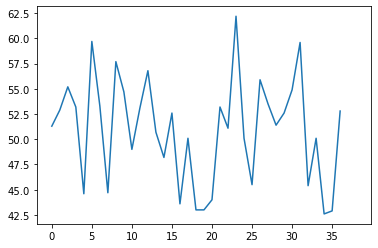

In [204]:
df["Density"].plot()


<AxesSubplot:>

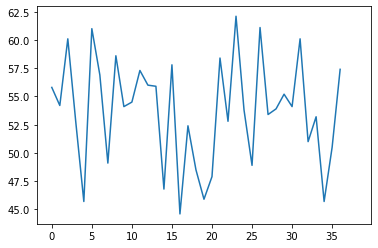

In [156]:
df["Female"].plot()


<AxesSubplot:>

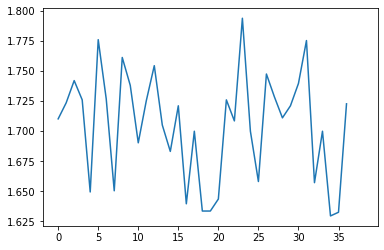

In [160]:
df["DensityScale"].plot()

<AxesSubplot:>

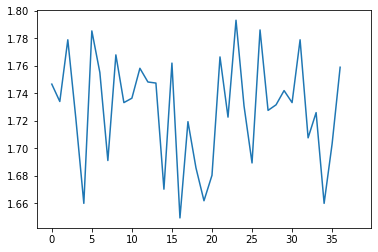

In [161]:
df["DensityScale1"].plot()

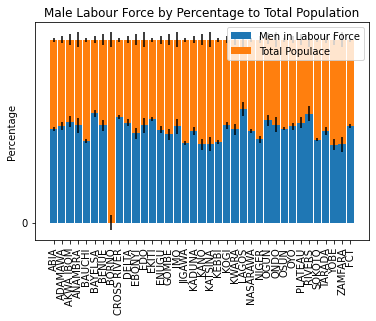

In [18]:


N = 37
menLabour = (51.3, 52.9, 55.2,53.2, 44.6, 59.7, 53.3, 00, 57.7, 54.7, 49, 53.15, 56.8, 50.75, 48.2, 52.6, 43.6, 50.1, 43, 43, 44, 53.2, 51.1, 62.2, 50.1, 45.5, 55.9, 53.5, 51.4, 52.6, 54.6, 59.6, 45.4, 50.1, 42.6, 42.9, 52.8)
Total = (48.7, 47.1, 44.8, 46.8, 55.4, 40.3, 46.7, 100, 42.3, 45.3, 51, 46.85, 43.2, 49.15, 51.8, 47.4, 56.4, 49.9, 57, 57, 56, 46.8, 48.9, 37.8, 49.9, 54.6, 44.9, 46.5, 48.6, 47.4, 45.4, 40.4, 54.6, 49.9, 57.4, 57.1, 47.2)
menStd = ( 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1)
womenStd = ( 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1)
ind = np.arange(N)    # the x locations for the groups
width = 0.90       # the width of the bars: can also be len(x) sequence
orientation : {'vertical', 'horizontal'}

p1 = plt.bar(ind, menLabour, width, yerr=menStd)
p2 = plt.bar(ind, Total, width,
             bottom=menLabour, yerr=womenStd)

plt.ylabel('Percentage')
plt.title('Male Labour Force by Percentage to Total Population')


plt.xticks(ind, ('ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI' ,'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA' ,'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'GOMBE' ,'IMO', 'JIGAWA', 'KADUNA', 'KANO', 'KATSINA' ,'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASARAWA' ,'NIGER', 'OGUN', 'ONDO', 'OSUN', 'OYO' ,'PLATEAU', 'RIVERS', 'SOKOTO', 'TARADA', 'YOBE' , 'ZAMFARA', 'FCT'), rotation=90)
plt.yticks(np.arange(0, 10, 20))
plt.legend((p1[0], p2[0]), ('Men in Labour Force', 'Total Populace'))

plt.show()

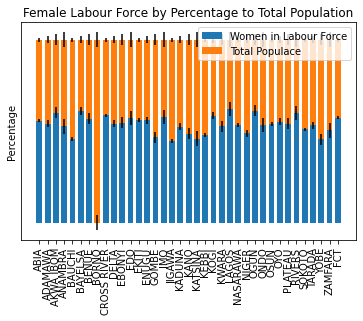

In [17]:
import numpy as np
import matplotlib.pyplot as plt


N = 37
womenLabour = (55.8, 54.2, 60.1,52.7, 45.7, 61, 56.9, 00, 58.6, 54.1, 54.5, 57.3, 56.0, 55.9, 46.8, 57.8, 44.6, 52.4, 48.5, 45.9, 47.9, 58.4, 52.8, 62.1, 53.4, 48.9, 61.1, 53.4, 53.9, 55.2, 54.1, 60, 51, 53.2, 45.7, 50.50, 57.4)
Total = (44.2, 45.8, 39.9, 47.3, 54.3, 39, 43.1, 100, 41.3, 45.9, 45.5, 42.7, 44, 44.1, 53.2, 42.2, 55.4, 47.6, 51.5, 54.1, 52.1, 41.6, 47.1, 37.9, 46.6, 51.1, 38.9, 46.6, 46.1, 44.8, 45.9, 40, 49, 46.8, 54.3, 49.50, 42.6)
menStd = ( 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1)
womenStd = ( 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1)
ind = np.arange(N)    # the x locations for the groups
width = 0.70       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind, womenLabour, width, yerr=menStd)
p2 = plt.bar(ind, Total, width,
             bottom=womenLabour, yerr=womenStd)

plt.ylabel('Percentage')
plt.title('Female Labour Force by Percentage to Total Population')


plt.xticks(ind, ('ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI' ,'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA' ,'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'GOMBE' ,'IMO', 'JIGAWA', 'KADUNA', 'KANO', 'KATSINA' ,'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASARAWA' ,'NIGER', 'OGUN', 'ONDO', 'OSUN', 'OYO' ,'PLATEAU', 'RIVERS', 'SOKOTO', 'TARADA', 'YOBE' , 'ZAMFARA', 'FCT'), rotation=90)
plt.yticks(np.arange(100, 10))
plt.legend((p1[0], p2[0]), ('Women in Labour Force', 'Total Populace'))

plt.show()